### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
import itertools
import plotly.express as px
import warnings
from matplotlib.patches import Patch
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [2]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')


### Loading Data 

In [3]:
data=pd.read_csv("AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846359,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426826,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081482,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257103,132079200


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
731,2022-11-25,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
732,2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000
733,2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800
734,2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111380900
735,2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71176600


#### Statistical Summary 

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,736.000000,736.000000,736.000000,736.000000,736.000000,7.360000e+02
mean,130.013791,131.680119,128.420812,130.120421,129.067150,1.129576e+08
std,30.959733,31.209611,30.654432,30.938344,31.184133,5.642938e+07
min,57.020000,57.125000,53.152500,56.092499,55.082970,3.519590e+07
25%,115.437498,116.725000,113.717501,115.282500,113.785417,7.665268e+07
50%,135.744996,137.065002,133.730003,135.360001,134.290687,9.619820e+07
75%,150.780002,152.444996,149.339996,151.000000,150.417900,1.302939e+08
max,182.630005,182.940002,179.119995,182.009995,180.959747,4.265100e+08


In [6]:
# Exploring the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       736 non-null    object 
 1   Open       736 non-null    float64
 2   High       736 non-null    float64
 3   Low        736 non-null    float64
 4   Close      736 non-null    float64
 5   Adj Close  736 non-null    float64
 6   Volume     736 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.4+ KB


#### Data Preprocessing 

In [7]:
#Converting the Datatype of Date
data['Date']=pd.to_datetime(data['Date'])
data['Date'].dtype

dtype('<M8[ns]')

In [8]:
data.set_index('Date',inplace=True)

In [9]:
data['Date']=data.index

In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561539,135480400,2020-01-02
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846359,146322800,2020-01-03
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426826,118387200,2020-01-06
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081482,108872000,2020-01-07
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257103,132079200,2020-01-08


In [11]:
##Checking Null Values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

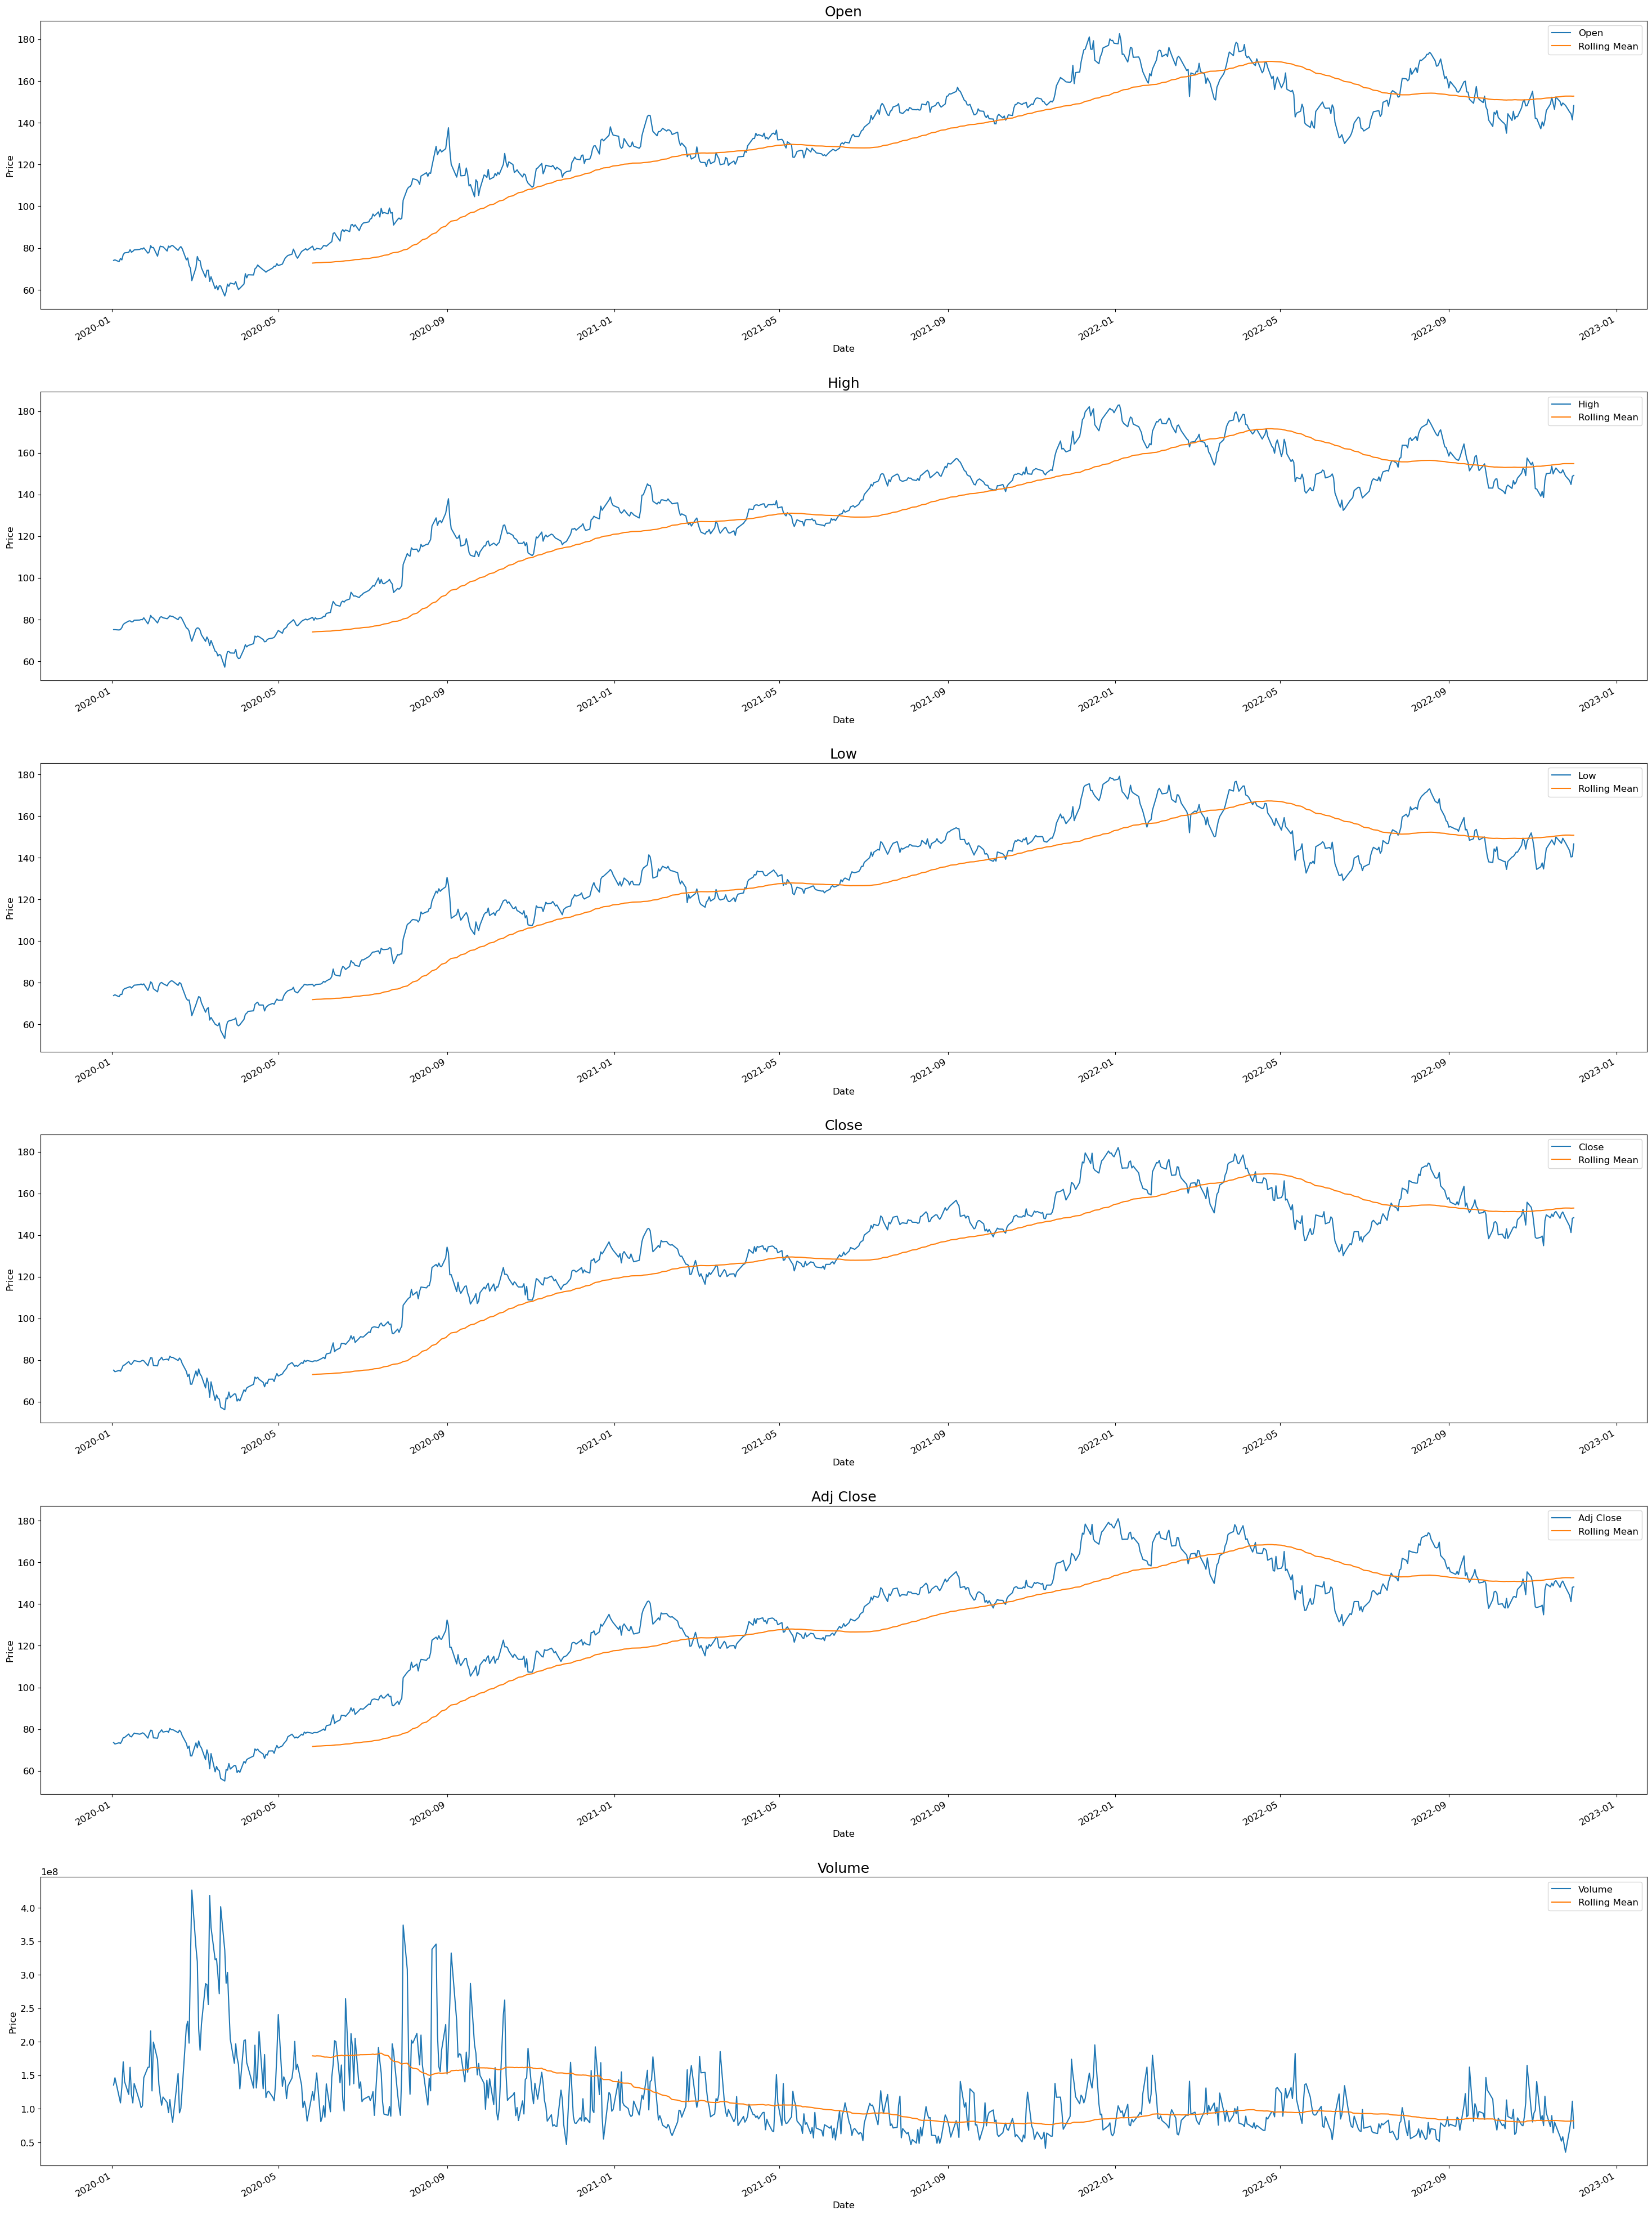

In [12]:
#Visualising 
col_names = data.columns
fig = plt.figure(figsize=(30, 40))
for i in range(6):
    ax = fig.add_subplot(6,1,i+1)
    ax.plot(data.iloc[:,i],label=col_names[i])
    data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
    ax.set_title(col_names[i],fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.patch.set_edgecolor('black')  
    plt.legend(prop={'size': 12})


fig.tight_layout(pad=3.0)

plt.show()

#### Feature Selection 


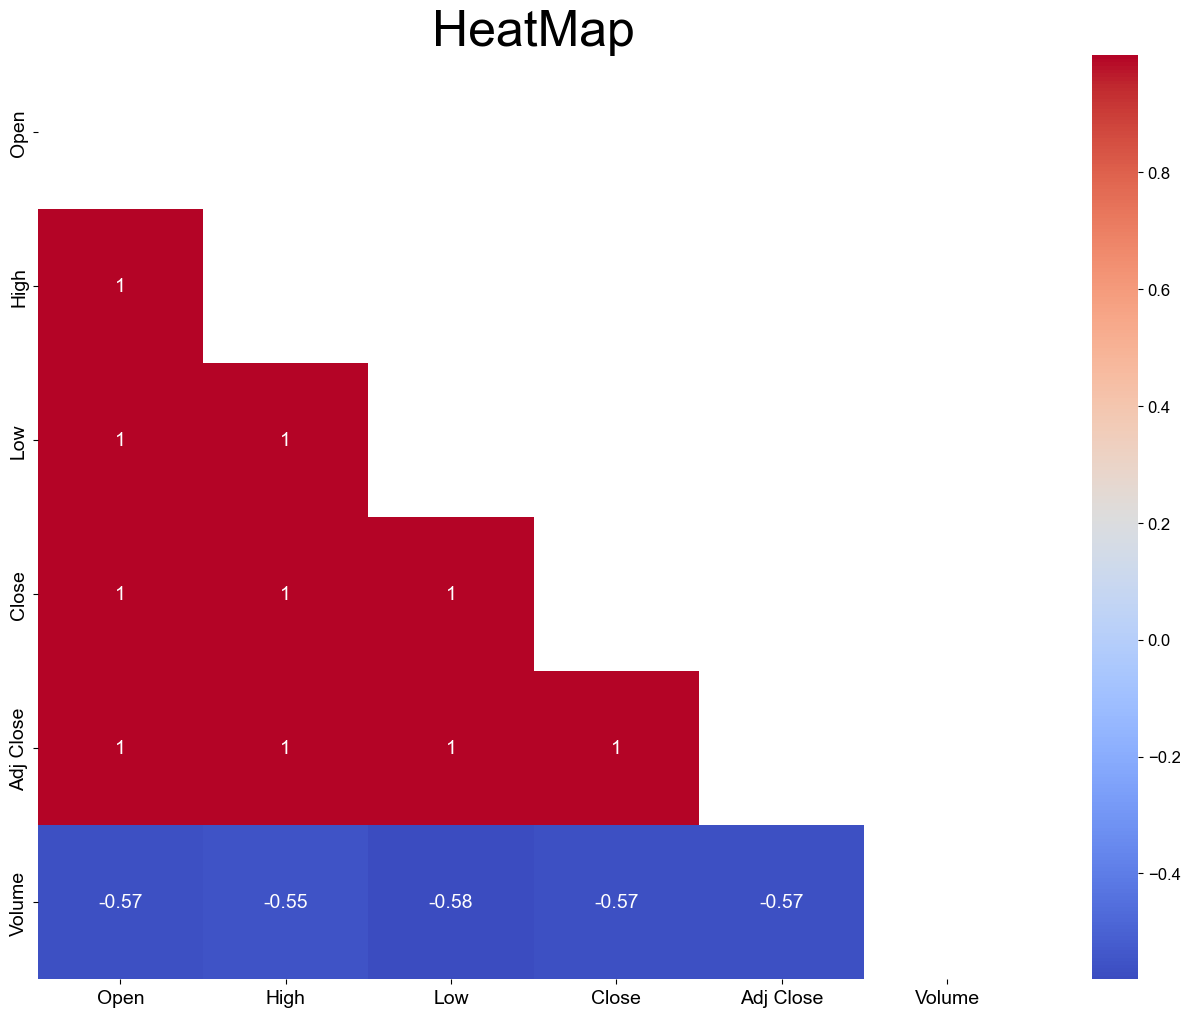

In [13]:
#HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(data.corr())
ax = sns.heatmap(data.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.show()

We can eliminate features like Open,Low, High Close automatically as they are high multicollinear with Adj Close .

We consider Adj Close as our target variables as it accounts for all corporate decisions like stock split and dividents

In [14]:
##Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])
data_feature_selected

,Adj Close,Date
Date,,
2020-01-02,73.561539,2020-01-02
2020-01-03,72.846359,2020-01-03
2020-01-06,73.426826,2020-01-06
2020-01-07,73.081482,2020-01-07
2020-01-08,74.257103,2020-01-08
...,...,...
2022-11-25,148.110001,2022-11-25
2022-11-28,144.220001,2022-11-28
2022-11-29,141.169998,2022-11-29


In [15]:
#Ordering the column as Date and Adj close
col_order=('Date','Adj Close')
data_feature_selected = data_feature_selected.reindex(columns=col_order)
data_feature_selected

,Date,Adj Close
Date,,
2020-01-02,2020-01-02,73.561539
2020-01-03,2020-01-03,72.846359
2020-01-06,2020-01-06,73.426826
2020-01-07,2020-01-07,73.081482
2020-01-08,2020-01-08,74.257103
...,...,...
2022-11-25,2022-11-25,148.110001
2022-11-28,2022-11-28,144.220001
2022-11-29,2022-11-29,141.169998


#### Resampling 
Resampling the Data to Monthly instead of Daily by Aggregating Using Mean

In [16]:
weekly_mean = data_feature_selected['Adj Close'].resample('w').mean()

In [17]:
weekly_data = weekly_mean.to_frame()
weekly_data

,Adj Close
Date,
2020-01-05,73.203949
2020-01-12,74.521124
2020-01-19,77.147151
2020-01-26,77.872734
2020-02-02,77.608096
...,...
2022-11-06,145.061273
2022-11-13,141.971997
2022-11-20,149.823996


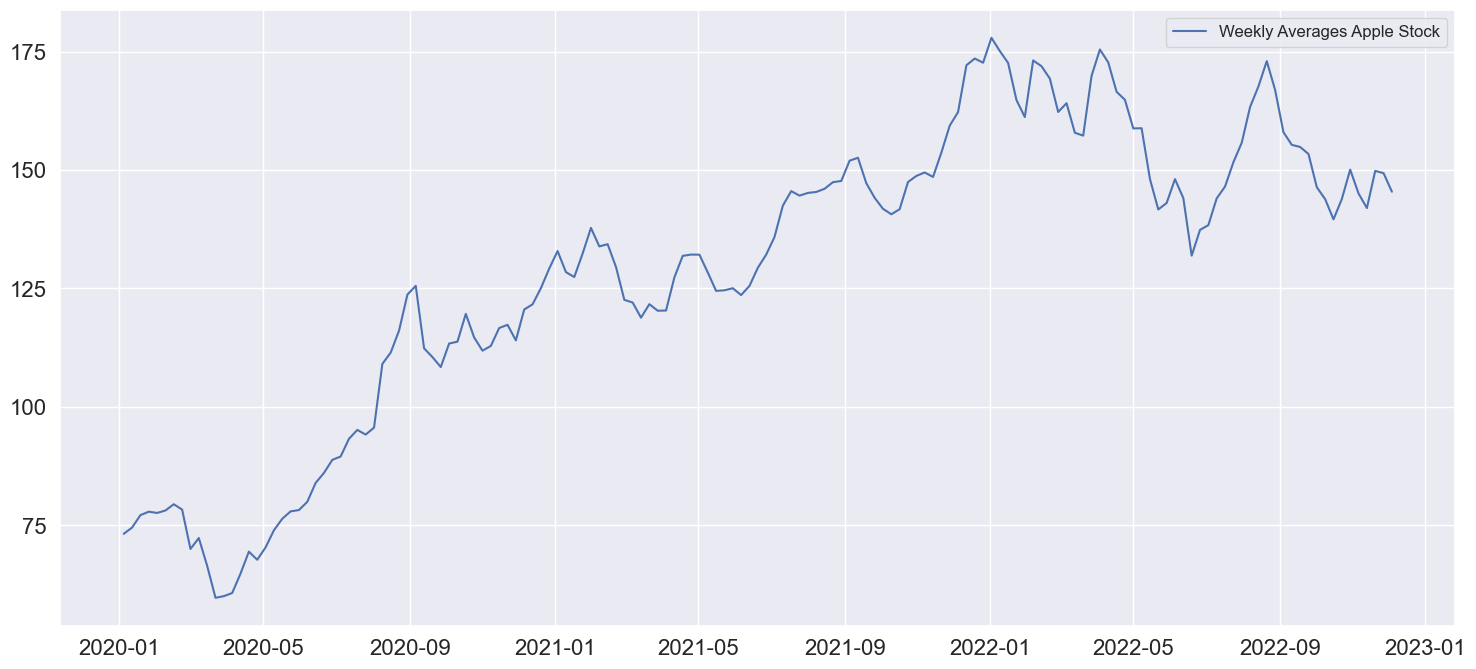

In [18]:
##Weekly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(weekly_data['Adj Close'],label='Weekly Averages Apple Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Weekly Resampled Data')
plt.legend(prop={'size': 12})
plt.show()

### EDA(Exploratory Data Analysis) 

In [19]:
weekly_data['Year'] = weekly_data.index.year
weekly_data['Month'] = weekly_data.index.strftime('%B')
weekly_data['dayofweek'] = weekly_data.index.strftime('%A')
weekly_data['quarter'] = weekly_data.index.quarter
weekly_data

,Adj Close,Year,Month,dayofweek,quarter
Date,,,,,
2020-01-05,73.203949,2020,January,Sunday,1
2020-01-12,74.521124,2020,January,Sunday,1
2020-01-19,77.147151,2020,January,Sunday,1
2020-01-26,77.872734,2020,January,Sunday,1
2020-02-02,77.608096,2020,February,Sunday,1
...,...,...,...,...,...
2022-11-06,145.061273,2022,November,Sunday,4
2022-11-13,141.971997,2022,November,Sunday,4
2022-11-20,149.823996,2022,November,Sunday,4


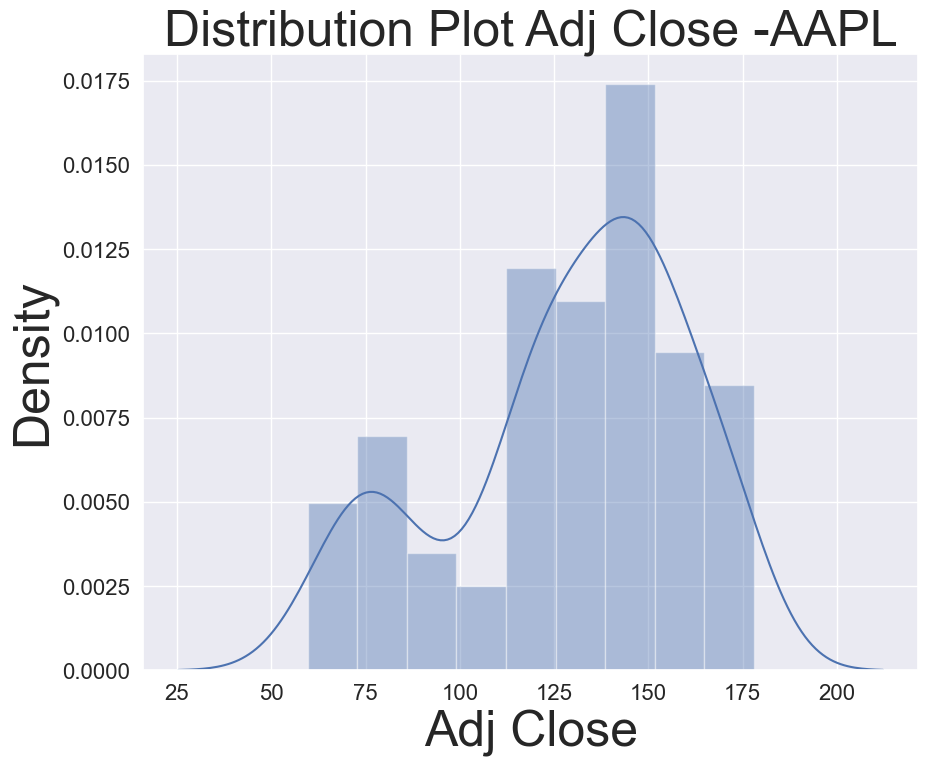

In [20]:
##Checking Distribution of Our Data 
fig = plt.figure(figsize=(10,8))
sns.distplot(weekly_data['Adj Close']).set_title("Distribution Plot Adj Close -AAPL")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

##### Distribution Plot Interference:
- Data does'nt follow Normal Distribution.

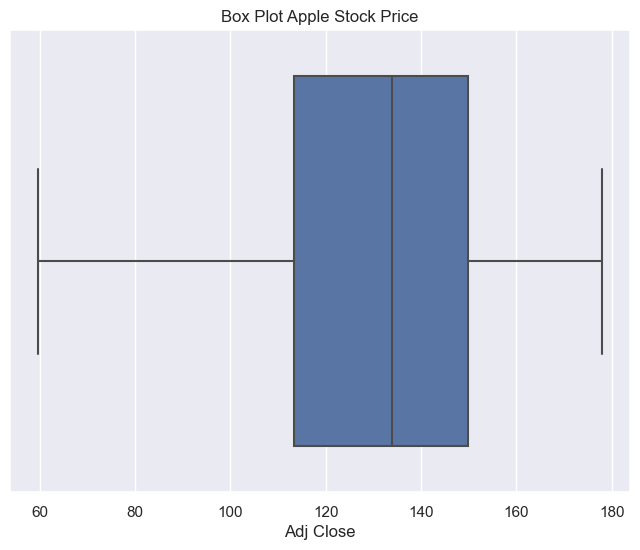

In [21]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(weekly_data['Adj Close']).set_title('Box Plot Apple Stock Price')
plt.style.context('fivethirtyeight')


##### Box Plot Interference:
- Distribution Show Left Skew

In [22]:
print('Skewness of Distribution is ',weekly_data['Adj Close'].skew())
print('Kurtosis of Distribution is ',weekly_data['Adj Close'].kurtosis())

Skewness of Distribution is  -0.6127250051290991
Kurtosis of Distribution is  -0.5596463660097717


Stock Price is Heavily skewed 
- Left tailed Skewness

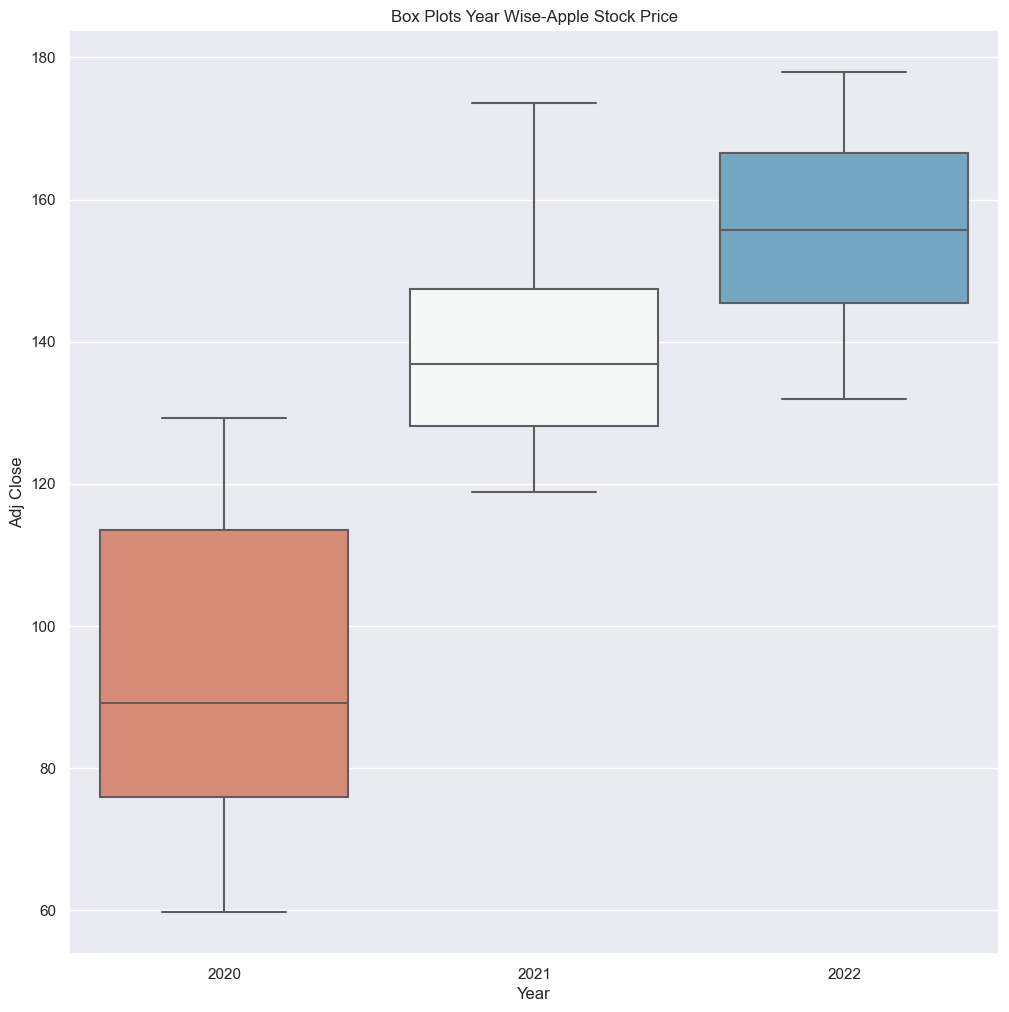

In [23]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x=weekly_data['Year'],y=weekly_data['Adj Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise-Apple Stock Price')
plt.style.context('fivethirtyeight')

->No Outliers Present 

->Upward Rising Trend is shown

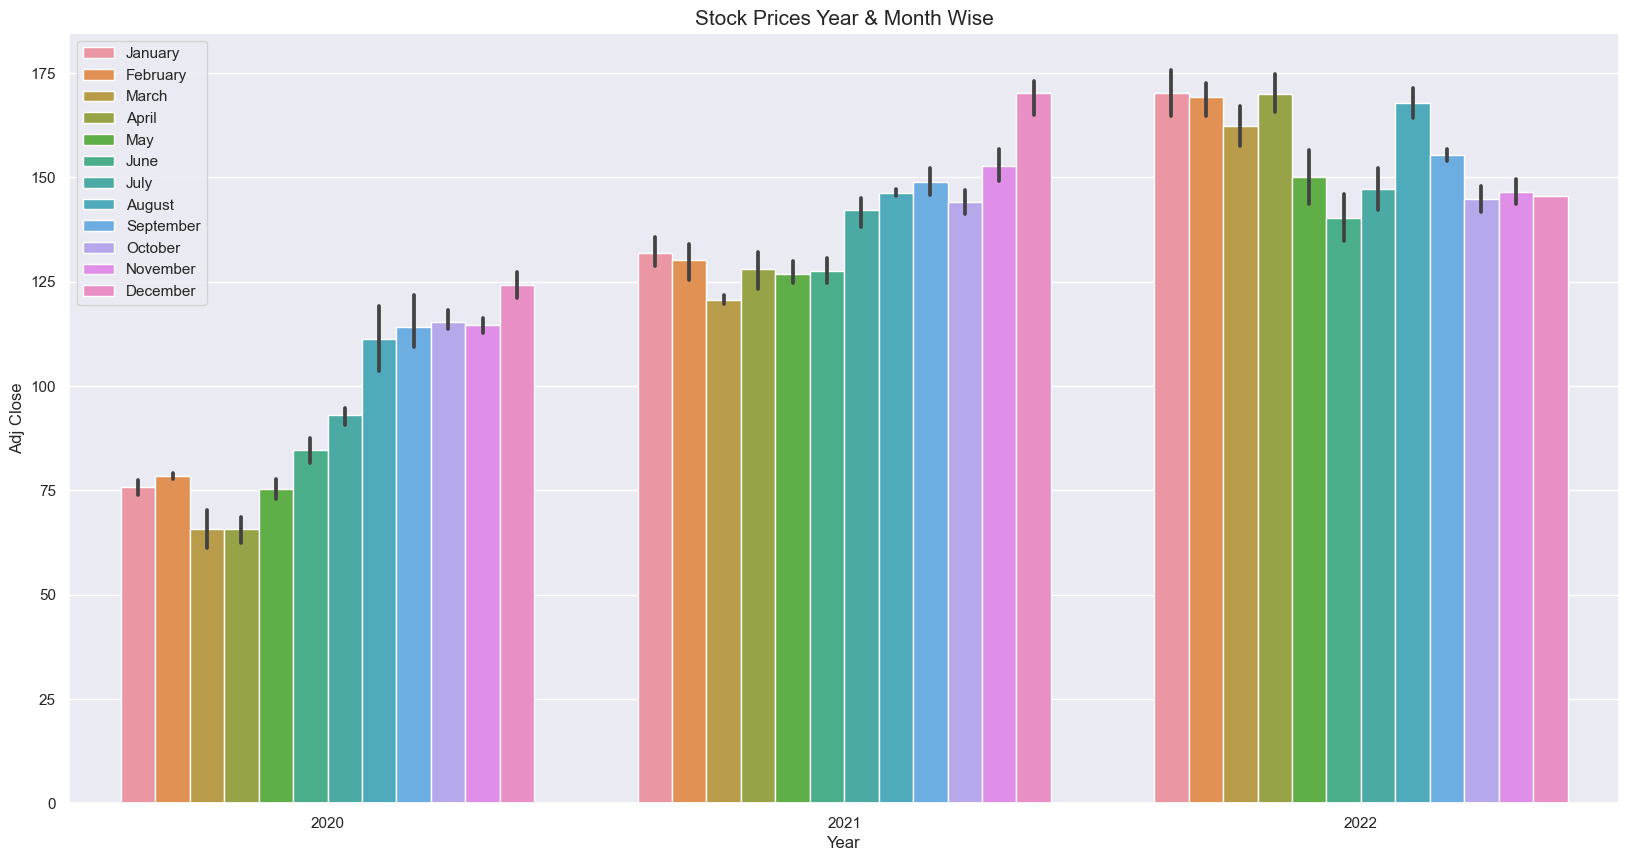

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=weekly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

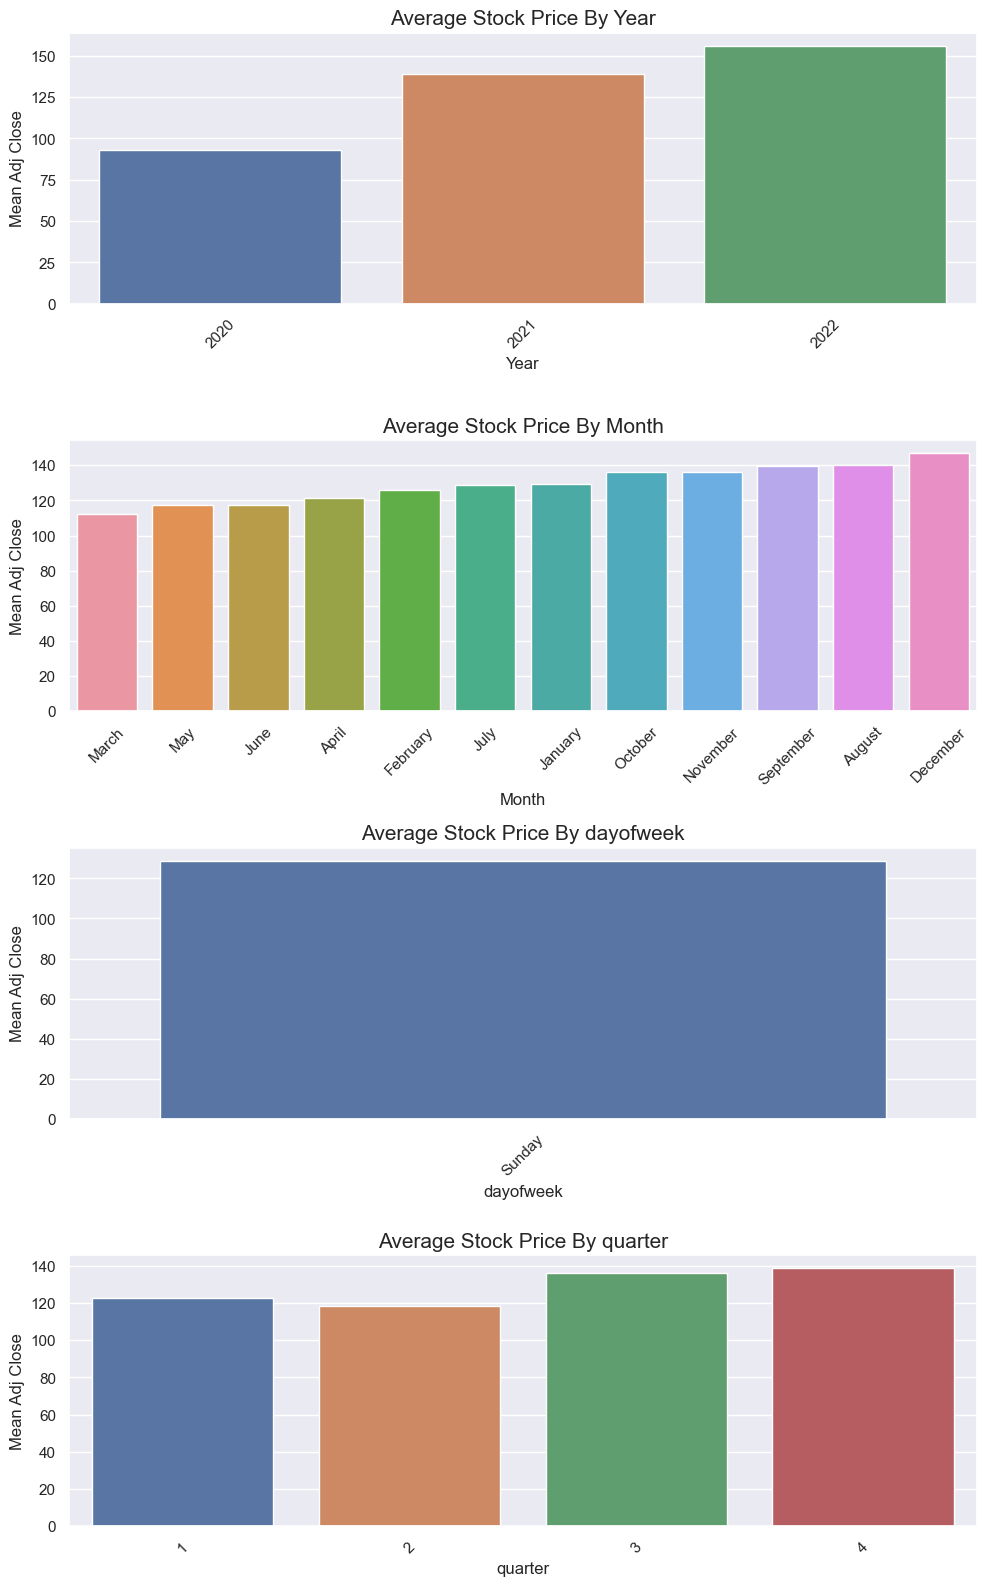

In [25]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = weekly_data.columns

for enum,i in enumerate(group_cols[1:]):
    ax = fig.add_subplot(4,1,enum+1)
    Aggregated = pd.DataFrame(weekly_data.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
    sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
    ax.set(xlabel=str(i), ylabel='Mean Adj Close')
    ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)

plt.tight_layout(pad=1)

->The Mean Price of the year 2020 is less compared to 2021 and 2022.

->The Average Price is Highest in the Month of December.

->Q4 is the best for Apple according to average stock price. By sales figures Q4 has always been strong for Apple since the new product cycle takes place and its the Holiday period. We also observe this as a seasonal effect for Apple.

### Decomposing 

<Figure size 2000x1600 with 0 Axes>

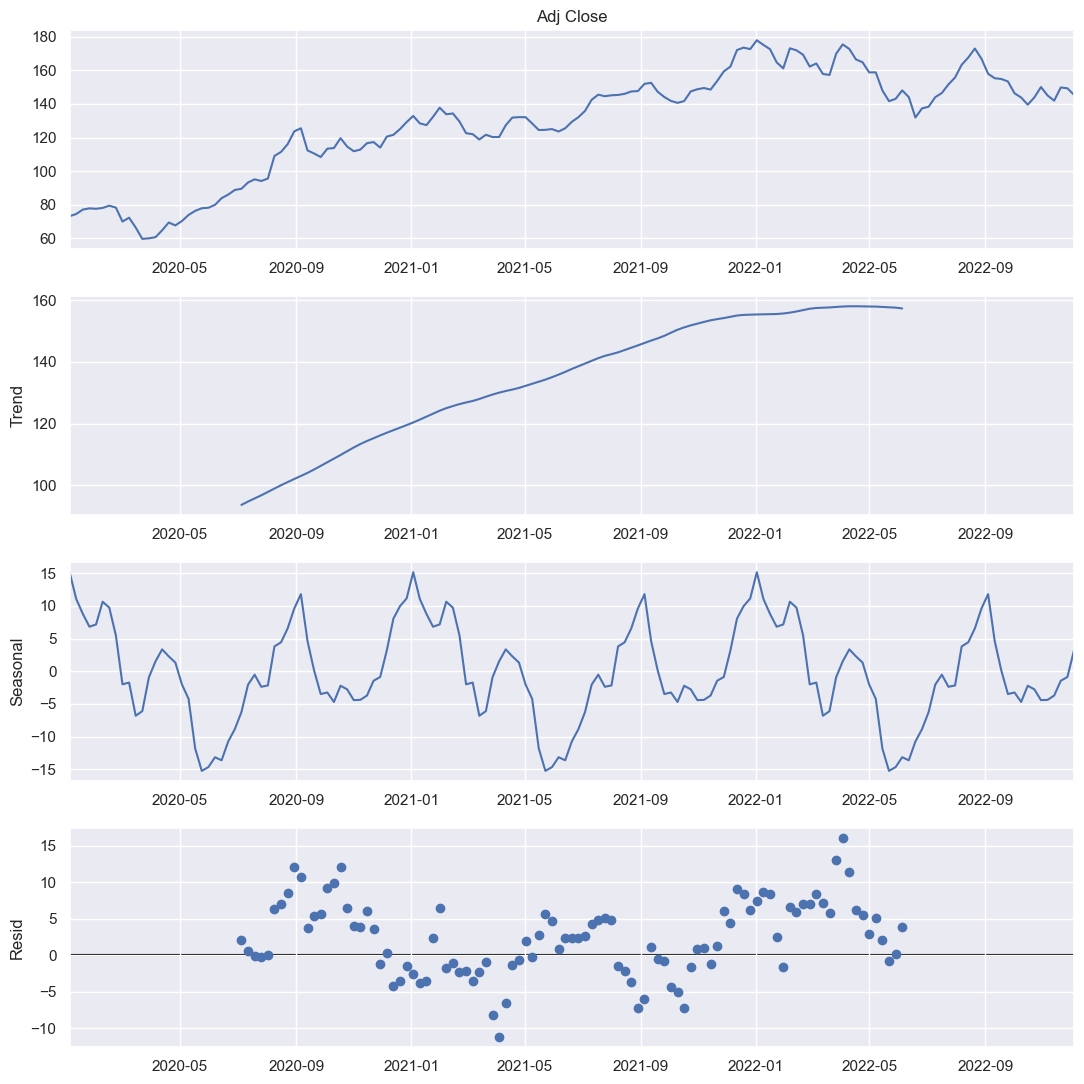

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 11,11
plt.figure(figsize=(20,16))
decomposed_series = sd(weekly_data['Adj Close'],model='additive')
decomposed_series.plot()
plt.show()

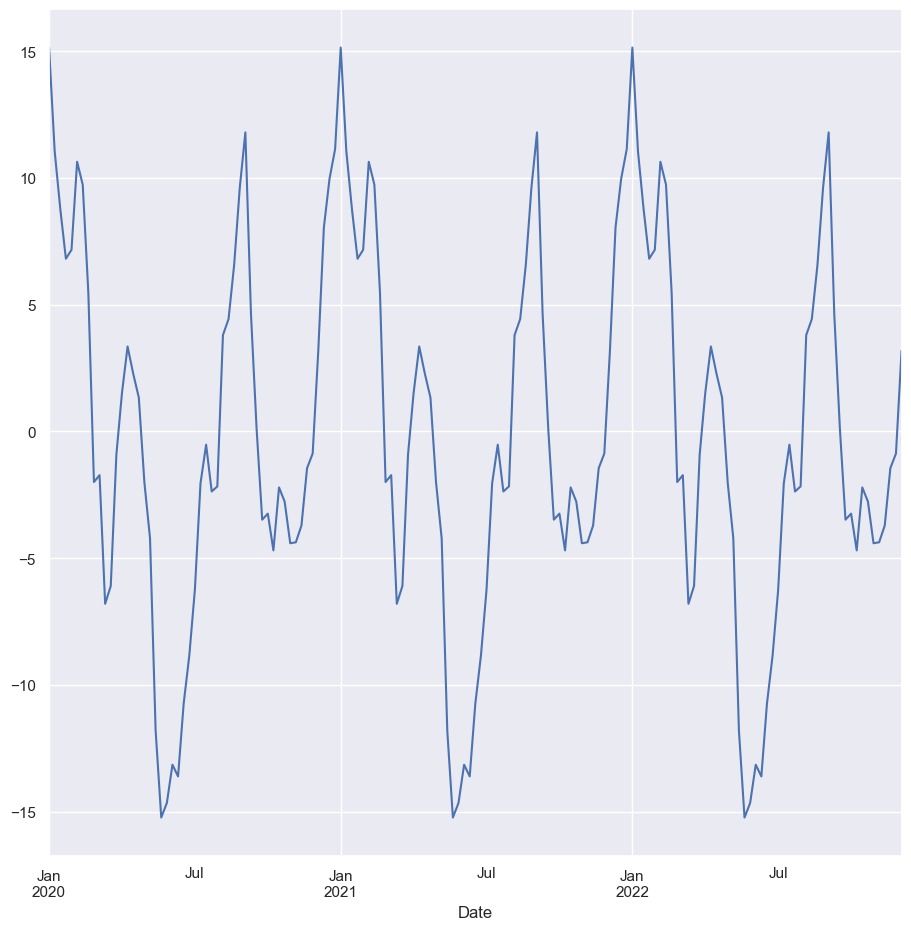

<Figure size 1500x300 with 0 Axes>

In [27]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2020':'2022'].plot()
fig = plt.figure(figsize=(15,3))

**Inferences By Decomposition :-**

->Trend : Overall an Upward Trend

-> Seasonality :There appears to be seasonality,AAPL has rallied during the Holiday season as expected. Since Holiday period has good sales for Apple Over the Years.

### Stationarity of Time Series 
**Stationarity Test of Time Series**

Using Augmented Dickey-Fuller(ADF) Test

**Null Hypothesis :** Time series has a unit root -It is non-stationary

**Alternate Hypothesis :** Time series does not have a unit root -It is stationary

Time Series is Stationary if we have constant mean,constant variance and No Trend and Seasonality

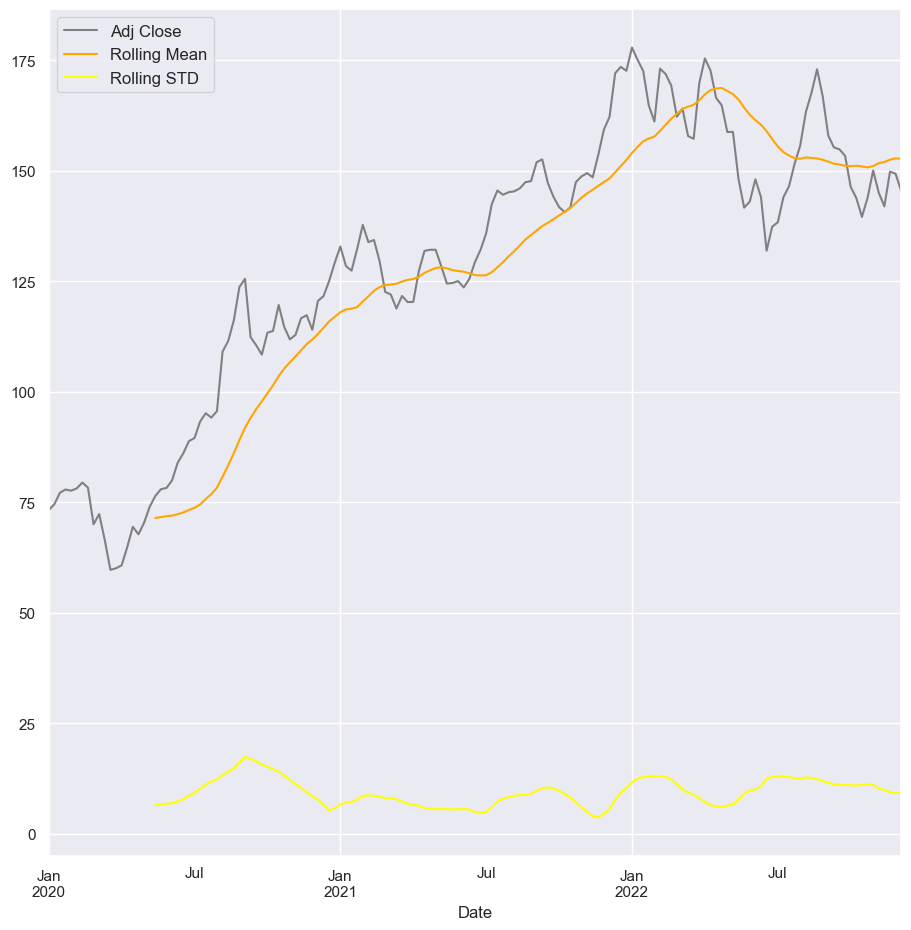

In [28]:
weekly_data['Adj Close'].plot(c='grey')
weekly_data['Adj Close'].rolling(20).mean().plot(label='Rolling Mean',c='orange')
weekly_data['Adj Close'].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

The Series is Not Stationary since the Mean and Variance are not constant.Let's Confirm this using Dickey-Fuller Test.

In [29]:

def ad_fuller_func(X):
    result_ad_fuller = adfuller(X)
    print('ADF Statistic: %f' % result_ad_fuller[0])
    print('p-value: %f' %result_ad_fuller[1])
    print('Critical Values:')
    for key, value in result_ad_fuller[4].items():
        print('\t%s: %.3f' % (key, value))
    if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
        print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
    else:
        print('Failed to Reject Ho-Time Series is Non-Stationary')

In [30]:
ad_fuller_func(weekly_data['Adj Close'])

ADF Statistic: -1.767648
p-value: 0.396638
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Failed to Reject Ho-Time Series is Non-Stationary


- Time Series is Not Stationary as observed earlier also by Decomposition(Trend and Seasonality Present)
- Statistically verified by ADF Test

**Transformations To Make Series Stationary**

In [31]:
##Differencing By 1
weekly_diff = weekly_data['Adj Close'] - weekly_data['Adj Close'].shift(1)

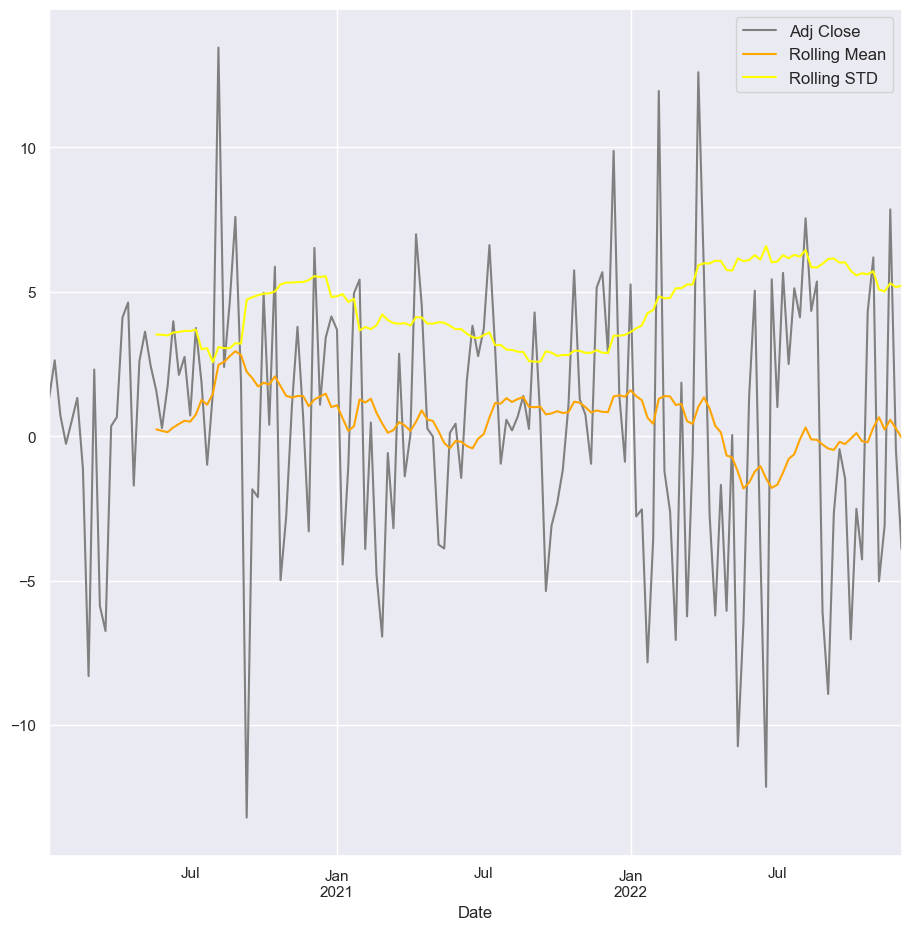

In [32]:
weekly_diff[1:].plot(c='grey')
weekly_diff[1:].rolling(20).mean().plot(label='Rolling Mean',c='orange')
weekly_diff[1:].rolling(20).std().plot(label='Rolling STD',c='yellow')
plt.legend(prop={'size': 12})

The series looks stationary as its having constant mean and variance .

In [33]:
##Checking if Time Series is Stationary by Running ADF Test
ad_fuller_func(weekly_diff[1:])

ADF Statistic: -9.680621
p-value: 0.000000
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Reject Null Hypothesis(Ho)-Time Series is Stationary


### Modeling Seasonal ARIMA 

In [34]:
modelling_series = weekly_data['Adj Close']
modelling_series

Date
2020-01-05     73.203949
2020-01-12     74.521124
2020-01-19     77.147151
2020-01-26     77.872734
2020-02-02     77.608096
                 ...    
2022-11-06    145.061273
2022-11-13    141.971997
2022-11-20    149.823996
2022-11-27    149.342499
2022-12-04    145.432499
Freq: W-SUN, Name: Adj Close, Length: 153, dtype: float64

#### Splitting the Data into Train and Test 

In [35]:
train,test=split(modelling_series,train_size=0.7,shuffle=False)

In [36]:
train.head()

Date
2020-01-05    73.203949
2020-01-12    74.521124
2020-01-19    77.147151
2020-01-26    77.872734
2020-02-02    77.608096
Freq: W-SUN, Name: Adj Close, dtype: float64

In [37]:
test.head()

Date
2022-01-23    164.781151
2022-01-30    161.192474
2022-02-06    173.143045
2022-02-13    171.928201
2022-02-20    169.314032
Freq: W-SUN, Name: Adj Close, dtype: float64

In [38]:
print('Length of Training Data',len(train))
print('Length of Testing Data',len(test))

Length of Training Data 107
Length of Testing Data 46


In [39]:
train.head()

Date
2020-01-05    73.203949
2020-01-12    74.521124
2020-01-19    77.147151
2020-01-26    77.872734
2020-02-02    77.608096
Freq: W-SUN, Name: Adj Close, dtype: float64

In [40]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of grid search Model parameter combinations for Seasonal-ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

Examples of grid search Model parameter combinations for Seasonal-ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)


Carrying out Grid Search to Select Parameters especially for Seasonal Component of the Time Series .


### Hyper Parameter Tuning for Model Order

In [ ]:
smallest=None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            sar_results = model.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, sar_results.aic))
            if smallest is None or sar_results.aic<smallest:
                smallest=sar_results.aic
                valor1=param
                valor2=param_seasonal
        except:
                    continue
print('Value AIC Minimum:',smallest)
print('Optimal pdq parameters:',valor1)
print('Optimal PDQS parameters:',valor2)         

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1321.0590097156896
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1182.3550796764273
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:968.4185917744312
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:812.7972879412564
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:714.0026730471257
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:2492.0521958864324
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:745.7424448937605
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:576.4541219556704
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:2825.9961436231083
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:784.5062158603823
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:759.4062591291154
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:661.6087574882321
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:722.6546898330438
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:698.6312395149928
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:2425.6177901912993
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:600.0630727596275
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:578.3885222733215
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:2429.3653067492496
ARIM

By Observing the Lowest AIC , we come to Seasonality Order of (0,1,2)12 and non-seasonal component is (2,1,1).

In [ ]:
model1 = sm.tsa.SARIMAX(train,order=(2,1,1),seasonal_order=(0,1,2,12))
sar_results=model1.fit()
sar_forecasts_train = sar_results.predict(start='2020-01-05',end='2022-01-16')
sar_forecasts_test = sar_results.predict(start='2022-01-23',end='2022-12-04')

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
mse = mean_squared_error(test, sar_forecasts_test)
print('MSE: '+str(mse))
mae = mean_absolute_error(test,sar_forecasts_test)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test,sar_forecasts_test))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(sar_forecasts_test - test)/np.abs(test))
print('MAPE: '+str(mape))
     

with MAPE 22.2%, we have accuracy 77.8%.

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

sar_forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

sar_forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [ ]:
print(sar_results.summary())

Inference from Residual Analysis :-

->We observe that the residual plot kind of follows stationarity.

->The Distribution of Training Data residuals is showing almost Normal Distribution.

->The QQPlot points towards Normal Distribution

->Correlogram shows no relation -which indicates they are un-correlated.

Overall the model is captured the Stock Price in a good manner.

### Modeling ARIMA

In [ ]:
#Fitting the ARIMA model with p=2,d=1,q=1.
#ARIMA model
model2=  sm.tsa.arima.ARIMA(train, order=(2,1,1))
ar_result = model2.fit()

In [ ]:
ar_forecasts_train = ar_result.predict(start='2020-01-05',end='2022-01-16')
ar_forecasts_test = ar_result.predict(start='2022-01-23',end='2022-12-04')

In [ ]:
mse = mean_squared_error(test, ar_forecasts_test)
print('MSE: '+str(mse))
mae = mean_absolute_error(test,ar_forecasts_test)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test,ar_forecasts_test))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(ar_forecasts_test - test)/np.abs(test))
print('MAPE: '+str(mape))
     

with MAPE 11.5%, we have accuracy 88.5%.
     

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

ar_forecasts_train.plot(label='Forecasts',ax=ax1,title='ARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

ar_forecasts_test.plot(label='Forecasts',ax=ax2,title='ARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)

In [ ]:
print(ar_result.summary())

Inference from Residual Analysis :-

->We observe that the residual plot kind of follows stationarity.

->The Distribution of Training Data residuals is showing almost Normal Distribution.

->The QQPlot points towards Normal Distribution

->Correlogram shows no relation -which indicates they are un-correlated.

Overall the model is captured the Stock Price in a good manner.

SARIMAX Model:

 - MSE: 1498.5320776815433
 - MAE: 33.01133763623901
 - RMSE: 38.71087802777849
 - MAPE: 0.22235280451712344

->with MAPE 22.2%, we have accuracy 77.8%.
    

ARIMA Model:

- MSE: 401.75554164030984
- MAE: 16.93749919234568
- RMSE: 20.04384049129083
- MAPE: 0.11496171456445428

->with MAPE 11.5%, we have accuracy 88.5%.

**By Comparing the MAPE(Mean Absolute Percentage Error) of both the Model (ARIMA & SARIMAX) we can conclude that the accuracy of ARIMA Model is Greater than the Accuracy of SARIMAX model.Our Data is best with ARIMA Model.**